# Matching Pursuit

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

We import the h0

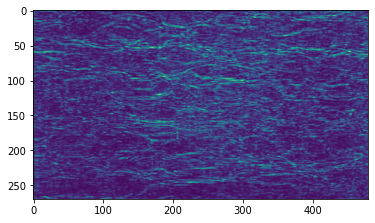

In [15]:
#Import image
h = Image.open('from_camera/test03/dist_00000.png')
realsize=h.size
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)

h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h,dtype=float)
h = h[:, :, 0]
h -= h.mean()

plt.imshow(h)
plt.show()

Autocorrelation to check if it is a good PSF

25623015.98128858


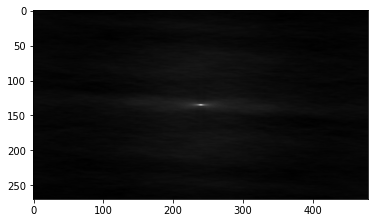

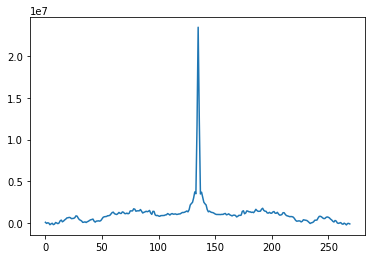

In [88]:
hf = np.flip(h)
h_auto=signal.fftconvolve(h,hf,mode='same')
h_max=np.amax(h_auto)
print(h_max)

# Plotting
[h_auto_y,h_auto_x]=h_auto.shape
plt.imshow(h_auto,cmap='gray')
plt.show()
plt.plot(h_auto[:,int(h_auto_x/2)+1])
plt.show()

We generate the image x

[167 142  36 138  49 212 230 133 228  21]
[209  12 263 208 201 158  98 297 143 128]


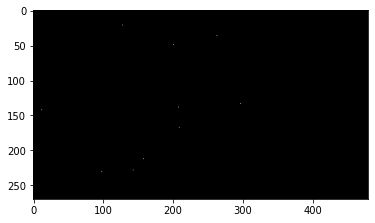

In [17]:
np.random.seed(2)
x=np.zeros((h_auto_y,h_auto_x),dtype=float)
k=10
random_x=(np.random.rand(k)*h_auto_x).astype(int)
random_y=(np.random.rand(k)*h_auto_y).astype(int)
x[random_y,random_x]=1
print(random_y)
print(random_x)
plt.imshow(x,cmap='gray')
plt.show()

We generate y as x*h

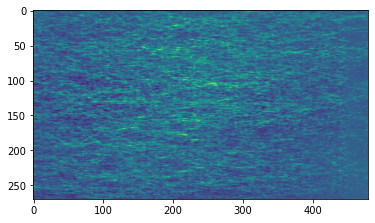

In [18]:
y=signal.fftconvolve(x,h,mode='same')
plt.imshow(y)
plt.show()

First, we start with one single comparation

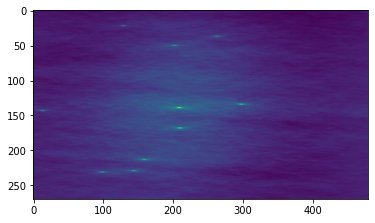

[139.0, 209.0]


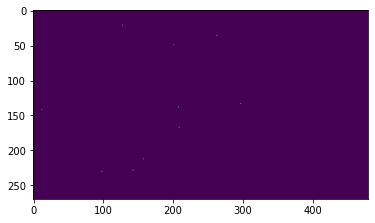

In [19]:
# for i in range(k):
x_star=signal.fftconvolve(y,np.flip(h),mode='same')
plt.imshow(x_star)
plt.show()

max_=np.amax(x_star)
[max_y,max_x]=np.where(x_star==max_)
max_y=float(max_y)
max_x=float(max_x)
print([max_y,max_x])

plt.imshow(x)
plt.show()

MP

[138, 208]
[167, 209]
[133, 297]
[212, 158]
[228, 143]
[49, 201]
[230, 98]
[142, 12]
[36, 263]
[21, 128]


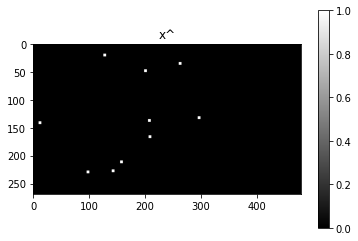

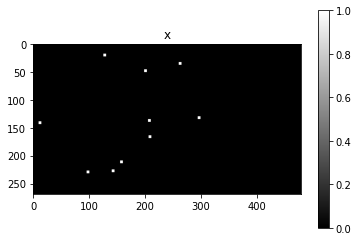

In [20]:
x_hat=np.zeros((h_auto_y,h_auto_x),dtype=float)
y_mp=np.copy(y)
for i in range(k):
    x_star=signal.fftconvolve(y_mp,np.flip(h),mode='same')
    [max_y,max_x]=np.where(x_star==np.amax(x_star))
    z=np.zeros((h_auto_y,h_auto_x),dtype=float)
    z[max_y-1,max_x-1]=1
    x_hat+=z
    zz=signal.fftconvolve(z,h,mode='same')
    y_mp-=zz
    print([int(max_y-1),int(max_x-1)])
    # plt.imshow(signal.fftconvolve(z,np.array([[1,1,1],[1,1,1],[1,1,1]])),cmap='gray')
    # plt.show()
    
    
plt.figure()
plt.imshow(signal.fftconvolve(x_hat,np.ones((5,5),dtype=float),mode='same'),cmap='gray')
plt.colorbar()
plt.title('x^')
plt.show()

plt.imshow(signal.fftconvolve(x,np.ones((5,5),dtype=float),mode='same'),cmap='gray')
plt.colorbar()
plt.title('x')
plt.show()


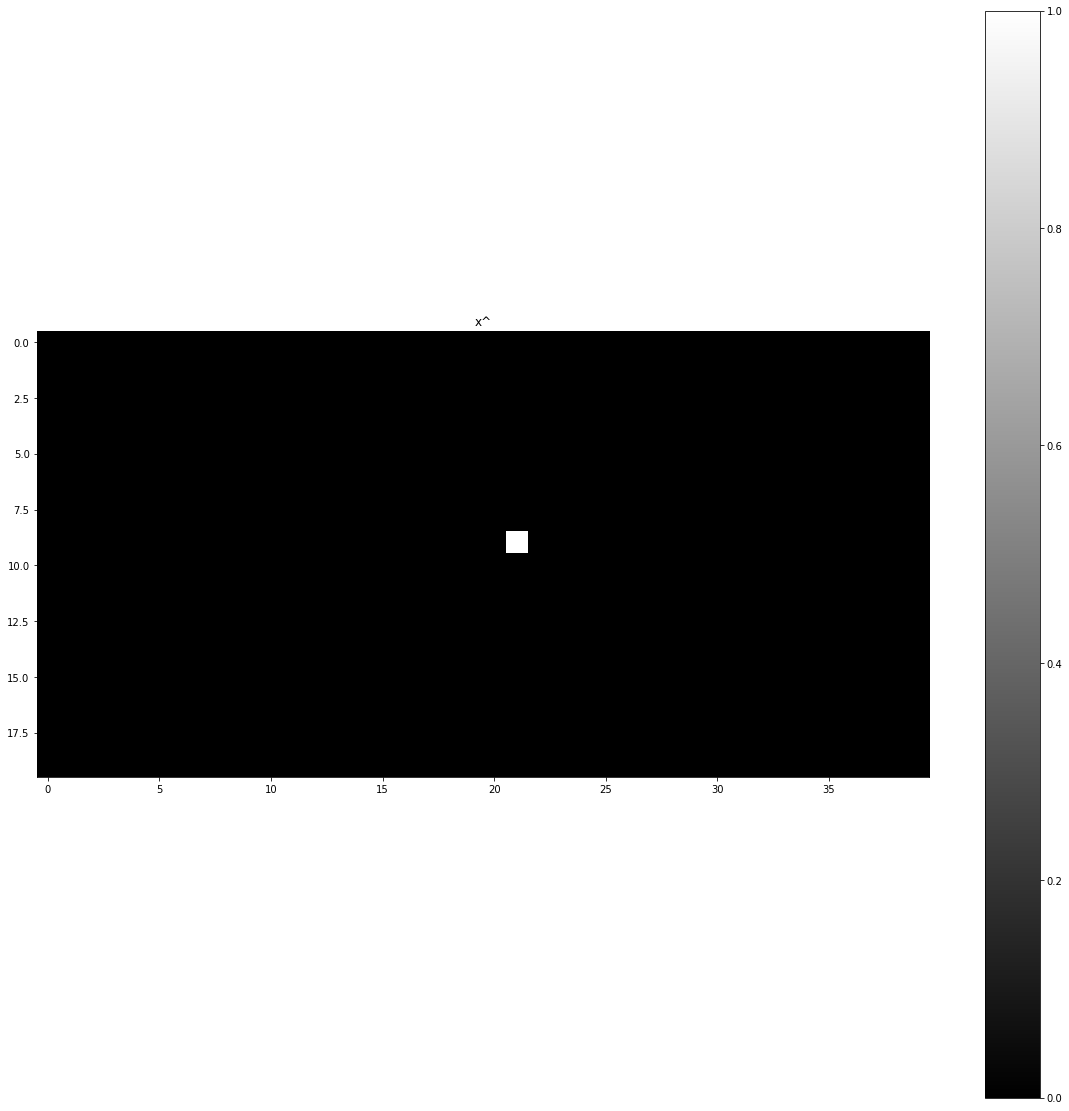

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(x_hat[40:60,180:220],cmap='gray')
plt.colorbar()
plt.title('x^')
plt.show()

0.0


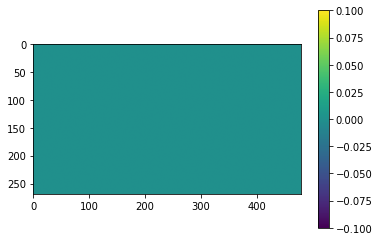

In [22]:
print(np.sum(x-x_hat))
plt.figure()
plt.imshow(x-x_hat)
plt.colorbar()
plt.show()

In [59]:
np.linalg.norm(x-x_hat)

4.0

In [60]:
# SNR
ratio=np.linalg.norm(x)/np.linalg.norm(x-x_hat)
snr=20*np.log10(ratio)

print(ratio)
print(snr)

4.905354217587146
13.813407468525758


## Part 2 - Complex figure: Dotted letter A

In [25]:
# x = Image.open('images/a.png')
# x=x.resize(newsize,Image.ANTIALIAS)
# x = np.array(x,dtype=float)
# x = x[:, :, 0]
# x = np.where(x>127, 1.0, 0.0)
# print(np.count_nonzero(x == 1))
# # plt.figure(figsize=(8,8))
# plt.imshow(x,cmap='gray')
# plt.show()

# y=signal.fftconvolve(x,h,mode='same')
# plt.imshow(y)
# plt.show()

In [26]:
# x_hat=np.zeros((h_auto_y,h_auto_x),dtype=float)
# y_mp=np.copy(y)
# for i in range(1000):
#     x_star=signal.fftconvolve(y_mp,np.flip(h),mode='same')
#     [max_y,max_x]=np.where(x_star==np.amax(x_star))
#     z=np.zeros((h_auto_y,h_auto_x),dtype=float)
#     z[max_y-1,max_x-1]=1
#     # z=signal.fftconvolve(z,np.ones((20,20),dtype=float),mode='same')
#     x_hat+=z
#     zz=signal.fftconvolve(z,h,mode='same')
#     y_mp-=zz
#     # print([int(max_y-1),int(max_x-1)])
#     # plt.imshow(signal.fftconvolve(z,np.array([[1,1,1],[1,1,1],[1,1,1]])),cmap='gray')
#     # plt.show()


In [27]:
# plt.figure(figsize=(8,8))
# plt.imshow(x_hat,cmap='gray')
# plt.title('x^')
# plt.show()

# plt.figure(figsize=(8,8))
# plt.imshow(x,cmap='gray')
# plt.title('x')
# plt.show()

## Part 3 - Intensities

[167 142  36 138  49 212 230 133 228  21]
[209 100 263 208 201 158  98 297 143 128]
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
[[167. 142.  36. 138.  49. 212. 230. 133. 228.  21.]
 [209. 100. 263. 208. 201. 158.  98. 297. 143. 128.]
 [ 10.   9.   8.   7.   6.   5.   4.   3.   2.   1.]]


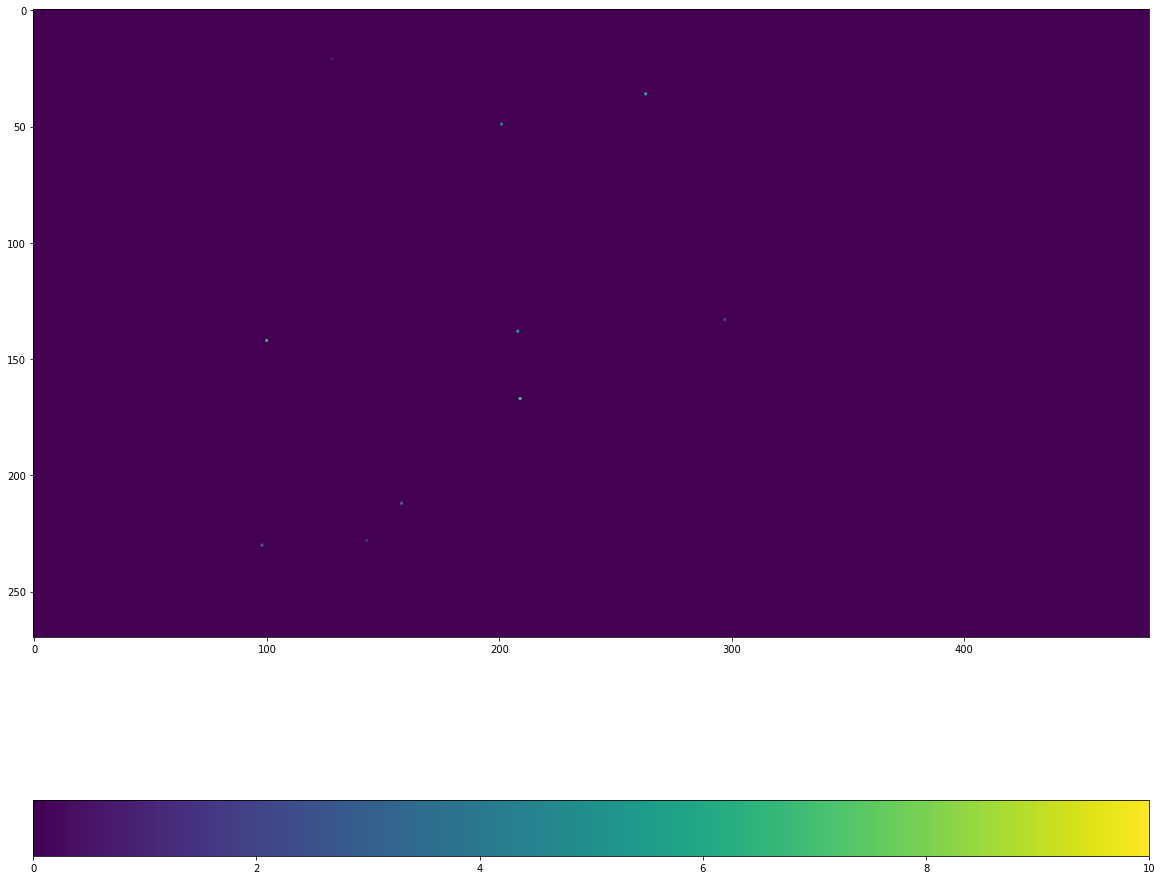

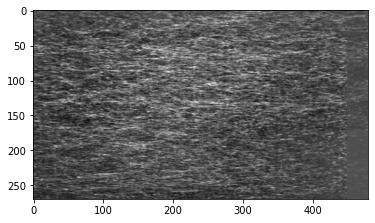

In [137]:
np.random.seed(2)
x=np.zeros((h_auto_y,h_auto_x),dtype=float)
k=10
random_x=(np.random.rand(k)*h_auto_x).astype(int)
random_y=(np.random.rand(k)*h_auto_y).astype(int)
random_w=np.array([],dtype=float)
random_x[1]=100
for i in range(k):
    x[random_y[i],random_x[i]]=(k-i)
    random_w=np.insert(random_w,len(random_w),k-i)
print(random_y)
print(random_x)
print(random_w)
x_points = np.array([random_y,random_x,random_w],dtype=float)
# x_points = x_points[:,None]
print(x_points)

plt.figure(figsize=(20,20))
plt.imshow(x)#,cmap='turbo')
plt.colorbar(orientation='horizontal')
plt.show()

y=signal.fftconvolve(x,h,mode='same')
plt.imshow(y,cmap='gray')
plt.show()

In [110]:
# x_hat=np.zeros((h_auto_y,h_auto_x),dtype=float)
# y_mp=np.copy(y)
# x_star=signal.fftconvolve(y_mp,np.flip(h),mode='same')
# [max_y,max_x]=np.where(x_star==np.amax(x_star))
# z=np.zeros((h_auto_y,h_auto_x),dtype=float)
# valueeee=np.amax(x_star)/h_max
# z[max_y-1,max_x-1]=1
# x_hat+=z
# zz=signal.fftconvolve(z,h,mode='same')
# y_mp-=zz
# print([int(max_y-1),int(max_x-1)],valueeee)
# # plt.imshow(signal.fftconvolve(z,np.array([[1,1,1],[1,1,1],[1,1,1]])),cmap='gray')
# # plt.show()
# # print(np.amax(x_star))

# plt.figure(figsize=(20,20))
# plt.imshow(x_hat,cmap='gray')
# plt.colorbar(orientation='horizontal')
# plt.title('x^')
# plt.show()

# plt.figure(figsize=(20,20))
# plt.imshow(x,cmap='gray')
# plt.colorbar(orientation='horizontal')
# plt.title('x')
# plt.show()

In [172]:
x_hat=np.zeros((h_auto_y,h_auto_x),dtype=float)
y_mp=np.copy(y)
i=0
mp_x=np.array([0],dtype=float)
mp_y=np.array([0],dtype=float)
mp_w=np.array([0],dtype=float)
while i < k:
    x_star=signal.fftconvolve(y_mp,np.flip(h),mode='same')
    [max_y,max_x]=np.where(x_star==np.amax(x_star))
    z=np.zeros((h_auto_y,h_auto_x),dtype=float)
    k_value=np.amax(x_star)/h_max
    z[max_y-1,max_x-1]=k_value
    x_hat+=z
    zz=signal.fftconvolve(z,h,mode='same')
    y_mp-=zz
    # print([int(max_y-1),int(max_x-1)],k_value)
    # plt.imshow(signal.fftconvolve(z,np.array([[1,1,1],[1,1,1],[1,1,1]])),cmap='gray')
    # plt.show()
    # print(np.amax(x_star))
    x_hat_points = np.array([mp_y,mp_x,mp_w],dtype=float) #Array containg 3 coordinates for every point
    if (max_y-1) in x_hat_points[0,:]: #If newPoint's y coordinate is in y_coordinates array:
        [loc]=np.where((max_y-1)==x_hat_points[0,:]) #We search the position
        if (max_x-1)==x_hat_points[1,int(loc)]: #If in this position newPoint's x coordinate is the same
            i += 0
        else:
            i += 1
            mp_x=np.insert(mp_x,len(mp_x),float(max_x-1))
            mp_y=np.insert(mp_y,len(mp_y),float(max_y-1))
            mp_w=np.insert(mp_w,len(mp_w),k_value)
    else:
        i += 1
        mp_x=np.insert(mp_x,len(mp_x),float(max_x-1))
        mp_y=np.insert(mp_y,len(mp_y),float(max_y-1))
        mp_w=np.insert(mp_w,len(mp_w),k_value)
    print(i)
x_hat_points = np.array([mp_y,mp_x,mp_w],dtype=float) #Array containg 3 coordinates for every point
    

print(x_points)
print(x_hat_points)

# plt.figure(figsize=(20,20))
# plt.imshow(x_hat,cmap='gray')
# plt.colorbar(orientation='horizontal')
# plt.title('x^')
# plt.show()

# plt.figure(figsize=(20,20))
# plt.imshow(x,cmap='gray')
# plt.colorbar(orientation='horizontal')
# plt.title('x')
# plt.show()


1
2
3
4
5
6
7
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
10
[[167. 142.  36. 138.  49. 212. 230. 133. 228.  21.]
 [209. 100. 263. 208. 201. 158.  98. 297. 143. 128.]
 [ 10.   9.   8.   7.   6.   5.   4.   3.   2.   1.]]
[[  0.         167.         138.         142.          36.
  212.          49.         133.         230.         228.
   21.        ]
 [  0.         209.         208.         100.         263.
  158.         201.         297.          98.         143.
  128.        ]
 [  0.           9.05585603   7.32548299   6.77241682   4.02561863
    3.44020072   3.4543385    2.50424892   2.29731941   1.32885378
    0.3842643 ]]


In [163]:
print(x_hat_points[0:2,0])
print(x_points[0:2,0]==x_hat_points[0:2,0])
print(x_hat_points[0,0] in x_points[0,:])
[loc]=np.where(x_hat_points[0,0]==x_points[0,:])
print(loc)
print(x_hat_points[1,0] in x_points[1,:])
print(x_hat_points[1,0]==x_points[1,int(loc)])

[167 209]
[ True  True]
True
[0]
True
True


In [108]:
# SNR
ratio=np.linalg.norm(x)/np.linalg.norm(x-x_hat)
snr=20*np.log10(ratio)

print(np.linalg.norm(x))
print(np.linalg.norm(x-x_hat))
print(ratio)
print(snr)

2.23606797749979
0.5539802694650352
4.036367540055361
12.119814099515512


In [134]:
print(x_points[:,0])

[167. 209.   1.]
